# loss 설정

- 회귀 작업일 경우 'mse'
- 분류 작업일 경우 'sparse_categorical_crossentropy'
- 2진 분류 작업일 경우 'binary_crossentropy'

## 회귀 작업

loss를 'mse'로 설정한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 2s 15ms/step - loss: 4524.0327 - mae: 54.1266 - val_loss: 1649.0200 - val_mae: 27.9130
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 1363.9792 - mae: 24.1006 - val_loss: 564.9267 - val_mae: 16.0018
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 743.2388 - mae: 19.7340 - val_loss: 5

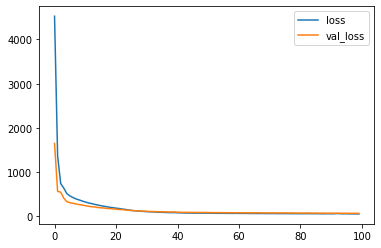

4/4 [==============================] - 0s 3ms/step - loss: 61.9868 - mae: 5.8369
loss= 61.98681640625
mae= 5.836866855621338


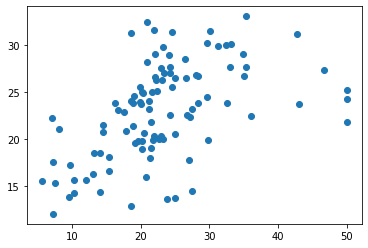

In [3]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()


## 분류 작업

loss를 'sparse_categorical_crossentropy'로 설정한다.

<br>

출력 데이터 y의 값은 category index 이어야 한다.

아래의 예에서의 train_y 값은 다음과 같다.
```
[1 0 2 1 1 0 1 0 1 2]
```

<br>

loss 이름 'sparse_categorical_crossentropy'에서<br> 'categorical'은 분류작업임을 의미하며,<br> 'sparse'는 y의 값이 category index임을 의미한다.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [5]:
def load_iris_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/iris_with_category_index.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:4]
  y = data[:,4]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [6]:
(train_x, train_y), (test_x, test_y) = load_iris_data()

In [7]:
print(train_y[:10])

[2. 2. 0. 2. 0. 1. 0. 1. 1. 1.]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 58ms/step - loss: 2.2082 - acc: 0.3421 - val_loss: 2.3870 - val_acc: 0.3500
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 2.1107 - acc: 0.3421 - val_loss: 2.2824 - val_acc: 0.3500
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 2.0159 - acc: 0.3421 - val_loss: 2.1824 - val_acc: 0.3

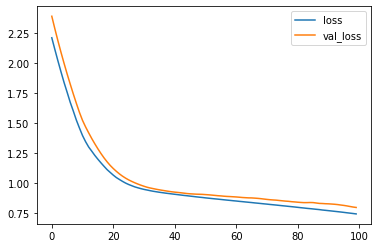

1/1 [==============================] - 0s 16ms/step - loss: 0.8412 - acc: 0.7083
loss= 0.8411985039710999
acc= 0.7083333134651184


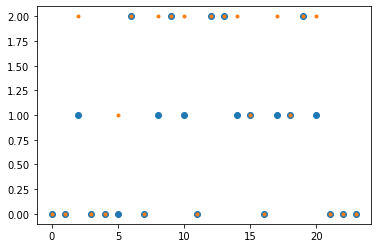

In [8]:
# 모델 정의
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(3, activation="softmax")) # 노드수는 카테고리 갯수 3, activation은 softmax


# 모델 컴파일
# model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


## 2진 분류 작업

loss를 'binary_crossentropy'로 설정한다.

<br>
출력 데이터 y의 값은 category index 이어야 한다.

2개 카테고리라서 category index값은 0,1 뿐이다.
```
[1 0 0 1 1 0 1 0 1 0]
```

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [10]:
def load_sonar_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/sonar.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:60]
  y = data[:,60]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [11]:
(train_x, train_y), (test_x, test_y) = load_sonar_data()

In [12]:
print(train_x.shape)
print(train_y.shape)

(165, 60)
(165,)


In [14]:
print(train_y[:10])

[0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 0s 34ms/step - loss: 0.7031 - acc: 0.4470 - val_loss: 0.6764 - val_acc: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6975 - acc: 0.4545 - val_loss: 0.6720 - val_acc: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6946 - acc: 0.4848 - val_loss: 0.6676 - val_acc: 0.63

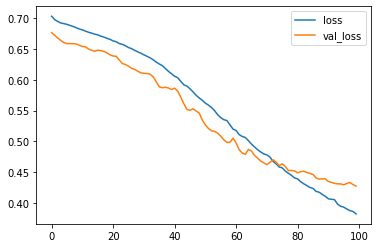

2/2 [==============================] - 0s 6ms/step - loss: 0.5465 - acc: 0.7381
loss= 0.5465498566627502
acc= 0.738095223903656


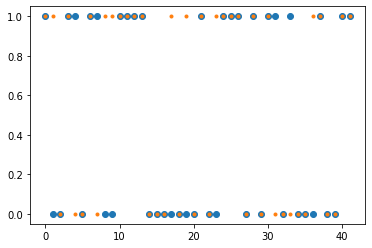

In [16]:
from tensorflow.keras.metrics import AUC, Precision, Recall

# 모델 정의
model = keras.Sequential()
model.add(Input(60))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation="softmax"))
model.add(Dense(1, activation="sigmoid")) # 노드는 1개, activation은 "sigmoid"


# 모델 컴파일
# model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"] )
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


# 예측
y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


# metric 설정

## 회귀 작업

"mae", "mape" 등을 설정할 수 있다.
- 'mae' : mean absolute error
- 'mape' : mean absolute percentage error

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [18]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 0s 17ms/step - loss: 3791.4612 - mae: 57.0069 - mape: 292.8765 - val_loss: 1228.9435 - val_mae: 32.1260 - val_mape: 147.5131
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 419.9321 - mae: 16.4302 - mape: 85.5215 - val_loss: 197.7164 - val_mae: 10.6295 - val_mape: 54.7456
Epoch 3/100
11/11 [================

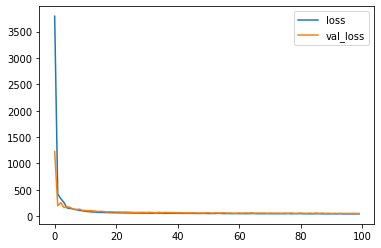

4/4 [==============================] - 0s 3ms/step - loss: 56.1388 - mae: 5.4040 - mape: 24.8815
loss= 56.13876724243164
mae= 5.404036521911621
mape= 24.881546020507812


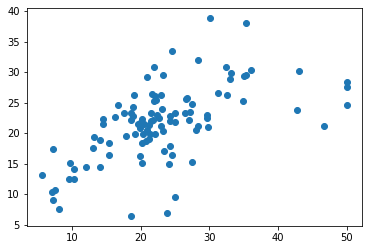

In [19]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae", "mape"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, mae, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
print("mape=", mape)


# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()


## 분류 작업
일반적으로 정확도를 지표로 사용한다.
- 'acc' : accuracy, 정확도. 예측한 것 중 정확히 예측한 비율.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [21]:
def load_iris_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/iris_with_category_index.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:4]
  y = data[:,4]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [22]:
(train_x, train_y), (test_x, test_y) = load_iris_data()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 66ms/step - loss: 1.5188 - acc: 0.4211 - val_loss: 2.2677 - val_acc: 0.1500
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 1.4304 - acc: 0.4211 - val_loss: 2.1016 - val_acc: 0.1500
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 1.3464 - acc: 0.4211 - val_loss: 1.9535 - val_acc: 0.1

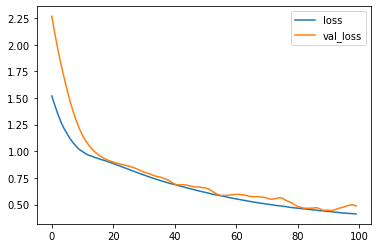

1/1 [==============================] - 0s 15ms/step - loss: 0.4626 - acc: 0.6667
loss= 0.46256980299949646
acc= 0.6666666865348816


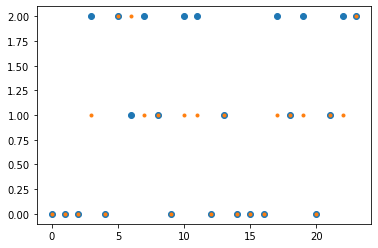

In [23]:
# 모델 정의
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


## 2진 분류 작업

만약 카테고리가 2개 이면 다음 지표를 설정할 수 있다.
- 'AUC', or AUC() : area under curve, ROC 그래프의 곡선 아래 면적
- Precision() : 정밀도. 긍정이랴 예측한 것중 정확히 예측한 비율
- Recall() : 회수율. 긍정 정답 중에 찾아낸 비율


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [24]:
def load_sonar_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/sonar.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:60]
  y = data[:,60]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [25]:
(train_x, train_y), (test_x, test_y) = load_sonar_data()

In [26]:
print(train_x.shape)
print(train_y.shape)

(165, 60)
(165,)


In [27]:
print(train_x[0])
print(train_y[:10])

[0.0072 0.0027 0.0089 0.0061 0.042  0.0865 0.1182 0.0999 0.1976 0.2318
 0.2472 0.288  0.2126 0.0708 0.1194 0.2808 0.4221 0.5279 0.5857 0.6153
 0.6753 0.7873 0.8974 0.9828 1.     0.846  0.6055 0.3036 0.0144 0.2526
 0.4335 0.4918 0.5409 0.5961 0.5248 0.3777 0.2369 0.172  0.1878 0.325
 0.2575 0.2423 0.2706 0.2323 0.1724 0.1457 0.1175 0.0868 0.0392 0.0131
 0.0092 0.0078 0.0071 0.0081 0.0034 0.0064 0.0037 0.0036 0.0012 0.0037]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                610       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 96ms/step - loss: 0.6764 - acc: 0.5530 - auc: 0.6940 - precision: 0.5462 - recall: 1.0000 - val_loss: 0.6266 - val_acc: 0.6667 - val_auc: 0.6880 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6710 - acc: 0.5606 - auc: 0.6988 - precision: 0.5504 - recall: 1.0000

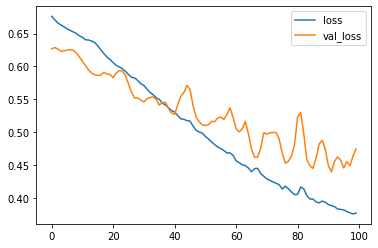

2/2 [==============================] - 0s 5ms/step - loss: 0.6079 - acc: 0.6429 - auc: 0.7303 - precision: 0.5789 - recall: 0.6111
loss= 0.6079331636428833
acc= 0.6428571343421936
auc= 0.7303240299224854
precision= 0.5789473652839661
recall= 0.6111111044883728


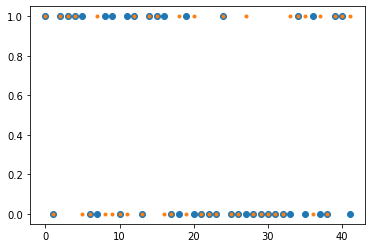

In [28]:
from tensorflow.keras.metrics import AUC, Precision, Recall

# 모델 정의
model = keras.Sequential()
model.add(Input(60))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc", "AUC", Precision(), Recall()])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc, auc, precision, recall = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
print("auc=", auc)
print("precision=", precision)
print("recall=", recall)


# 예측
y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


# batch size 결정 방법

model.fit() 호출 시 batch_size 파라매터로 설정한다.

2의 지수승의 값으로 하나씩 증가하면서 1 step의 처리 시간이 증가하기 바로 전의 batch size 값을 찾아낸다.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

In [30]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 4s 0us/step


In [31]:
print(train_x.shape)

(50000, 32, 32, 3)


In [32]:
# 모델 정의
model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Flatten())
model.add(Dense(1280, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [33]:
model.fit(train_x, train_y, epochs=3, batch_size=8, validation_split=0.2)

Epoch 1/3
5000/5000 [==============================] - 14s 3ms/step - loss: 5.0961 - acc: 0.0089 - val_loss: 4.6073 - val_acc: 0.0085
Epoch 2/3
5000/5000 [==============================] - 12s 2ms/step - loss: 4.6063 - acc: 0.0083 - val_loss: 4.6075 - val_acc: 0.0087
Epoch 3/3
5000/5000 [==============================] - 12s 2ms/step - loss: 4.6064 - acc: 0.0091 - val_loss: 4.6079 - val_acc: 0.0077


In [34]:
model.fit(train_x, train_y, epochs=3, batch_size=16, validation_split=0.2)

Epoch 1/3
2500/2500 [==============================] - 8s 3ms/step - loss: 4.6058 - acc: 0.0098 - val_loss: 4.6080 - val_acc: 0.0077
Epoch 2/3
2500/2500 [==============================] - 8s 3ms/step - loss: 4.6060 - acc: 0.0098 - val_loss: 4.6081 - val_acc: 0.0077
Epoch 3/3
2500/2500 [==============================] - 7s 3ms/step - loss: 4.6060 - acc: 0.0098 - val_loss: 4.6080 - val_acc: 0.0077


In [35]:
model.fit(train_x, train_y, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6055 - acc: 0.0100 - val_loss: 4.6080 - val_acc: 0.0077
Epoch 2/3
1250/1250 [==============================] - 4s 4ms/step - loss: 4.6056 - acc: 0.0096 - val_loss: 4.6080 - val_acc: 0.0077
Epoch 3/3
1250/1250 [==============================] - 4s 4ms/step - loss: 4.6056 - acc: 0.0096 - val_loss: 4.6079 - val_acc: 0.0077


In [36]:
model.fit(train_x, train_y, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 2s 4ms/step - loss: 4.6053 - acc: 0.0092 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
625/625 [==============================] - 2s 4ms/step - loss: 4.6053 - acc: 0.0103 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
625/625 [==============================] - 2s 4ms/step - loss: 4.6053 - acc: 0.0100 - val_loss: 4.6079 - val_acc: 0.0077


In [37]:
model.fit(train_x, train_y, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 1s 4ms/step - loss: 4.6051 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
313/313 [==============================] - 1s 4ms/step - loss: 4.6051 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 4.6052 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077


In [38]:
model.fit(train_x, train_y, epochs=3, batch_size=256, validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 1s 6ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
157/157 [==============================] - 1s 5ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
157/157 [==============================] - 1s 5ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077


In [39]:
model.fit(train_x, train_y, epochs=3, batch_size=512, validation_split=0.2)

Epoch 1/3
79/79 [==============================] - 1s 7ms/step - loss: 4.6049 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
79/79 [==============================] - 0s 6ms/step - loss: 4.6049 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
79/79 [==============================] - 0s 5ms/step - loss: 4.6049 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077


# 기타 설정/방법

## verbose 설정

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

In [41]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [42]:
# 모델 정의
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [43]:
model.fit(train_x, train_y, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.6272 - acc: 0.2094 - val_loss: 1.9368 - val_acc: 0.2744
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9190 - acc: 0.2764 - val_loss: 1.8290 - val_acc: 0.3029
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6478 - acc: 0.3939 - val_loss: 1.4101 - val_acc: 0.4888
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2173 - acc: 0.5876 - val_loss: 1.0673 - val_acc: 0.6304
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9940 - acc: 0.6766 - val_loss: 0.8958 - val_acc: 0.7142


In [44]:
model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=0, validation_split=0.2)

In [45]:
model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4581 - acc: 0.8768 - val_loss: 0.4342 - val_acc: 0.8952
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4133 - acc: 0.8896 - val_loss: 0.4224 - val_acc: 0.8925
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3851 - acc: 0.8946 - val_loss: 0.4074 - val_acc: 0.8997
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3699 - acc: 0.8989 - val_loss: 0.3838 - val_acc: 0.9062
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3584 - acc: 0.9032 - val_loss: 0.3778 - val_acc: 0.8980


In [46]:
model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/5
1500/1500 - 2s - loss: 0.3441 - acc: 0.9061 - val_loss: 0.4163 - val_acc: 0.8917
Epoch 2/5
1500/1500 - 2s - loss: 0.3371 - acc: 0.9080 - val_loss: 0.3906 - val_acc: 0.9013
Epoch 3/5
1500/1500 - 2s - loss: 0.3255 - acc: 0.9110 - val_loss: 0.3609 - val_acc: 0.9088
Epoch 4/5
1500/1500 - 2s - loss: 0.3215 - acc: 0.9120 - val_loss: 0.4124 - val_acc: 0.8978
Epoch 5/5
1500/1500 - 2s - loss: 0.3188 - acc: 0.9136 - val_loss: 0.3582 - val_acc: 0.9119


## loss, 성능지표 그리기

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

In [48]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [49]:
# 모델 정의
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=50, batch_size=256, validation_split=0.2)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 3.4577 - acc: 0.1132 - val_loss: 2.2706 - val_acc: 0.1084
Epoch 2/50
188/188 [==============================] - 0s 3ms/step - loss: 2.2192 - acc: 0.1506 - val_loss: 2.1453 - va

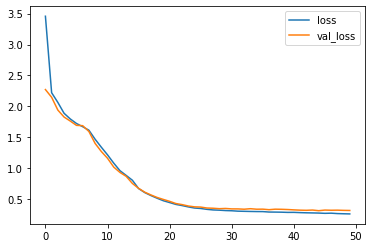

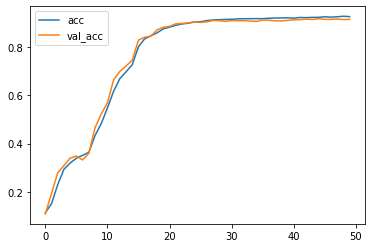

In [51]:
# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# 학습 로스 보기
plt.plot(history.history['acc'], label="acc")
plt.plot(history.history['val_acc'], label="val_acc")
plt.legend()
plt.show()


## 예측 결과 그리기

### 분류 작업

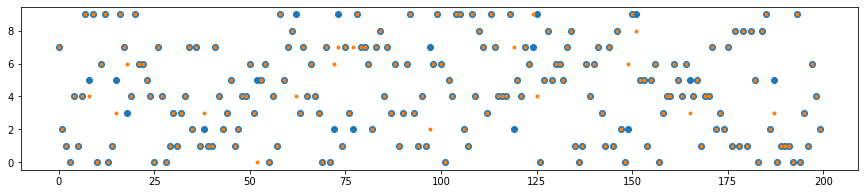

In [52]:
# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)


# 예측 결과 보기
plt.figure(figsize=(15,3))
plt.plot(test_y[:200], "o")
plt.plot(predicted[:200], ".")
plt.show()

### 회귀 작업 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [54]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

In [55]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


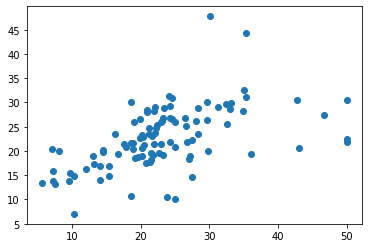

In [56]:
# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()
